In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<center><h1>Analyzing Crimes in Nigeria</h1></center>

**Looking at patterns in type crimes committed, locations as well as people involved, we may be able to predict possible crimes events before they happen**

*This data was gotten from online source and in no way is the analyst liable for the data*

**Reducing crimes in our nation, Nigeria, is of great importance. Tackling crimes with data science has proven to be successful with countries like the US collaborating with [Palantir](https://www.palantir.com/) using big data analysis to fight terrorism.**

**The objective of this analysis is look at the data we have, find patterns, make recommendations and possibly inform security stakeholders in Nigeria the need for data to be collected**

*Data collection does not have to be via data entries only, we could also work with existing crime records in prints using [Optical Character Recognition](https://en.wikipedia.org/wiki/Optical_character_recognition) technologies for data collection. Which will then be extracted and formatted for analysis*

## Points to Note
- In the last 3 years, crime rate in the country has risen by 68.31% according to [Numbeo](https://www.numbeo.com/crime/country_result.jsp?country=Nigeria)
- Crime and Safety indices in Nigeria are 71.38 and	28.62 respectively [Numbeo](https://www.numbeo.com/crime/country_result.jsp?country=Nigeria)

## Now we deep dive into the analysis

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from bokeh.io import output_notebook, show
import matplotlib
matplotlib.style.use('ggplot')
import datetime as dt
import calendar
import folium
from datetime import date

In [44]:
# output_notebook()

In [4]:
# load the dataset
crimes_df = pd.read_csv("/Users/olalekanelesin/data/NigeriaCrimes.csv")
crimes_df.EVENT_DATE = pd.to_datetime(crimes_df['EVENT_DATE'])
crimes_df['EVENT_MONTH'] = crimes_df.EVENT_DATE.apply(lambda x: x.strftime('%B'))
crimes_df['MONTH'] = crimes_df.EVENT_DATE.dt.month

In [128]:
## basic summary statistics of our dataset
# crimes_df.head()

**Basic Summary**
- Years covered: 1995 - 2015
- Total number of crimes recorded: 8541 (*This is may not be an accurate reflection*)
- An average of 5 fatalies per crime and a standard deviation of 28 with the maximum reaching 1000

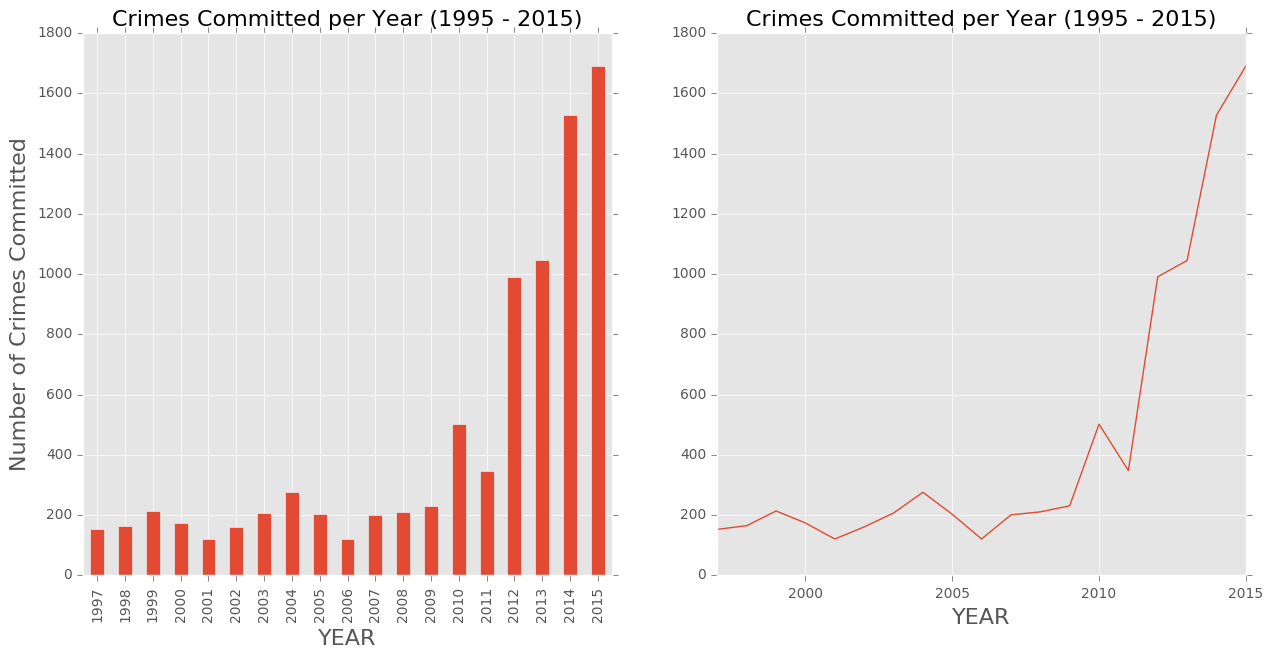

In [5]:
## lets explore number of crimes commited per year
fig, axs = plt.subplots(1,2, figsize=(15, 7))

axs[0].set_xlabel('YEAR', fontsize=16)
axs[0].set_title("Crimes Committed per Year (1995 - 2015)", fontsize=16)
axs[0].set_ylabel("Number of Crimes Committed", fontsize=16)

axs[1].set_xlabel('FY2016', fontsize=16)
axs[1].set_title("Crimes Committed per Year (1995 - 2015)", fontsize=16)
# axs[1].set_ylabel("Number of Crimes Committed", fontsize=16)

crimes_df.groupby('YEAR').size().plot(kind='bar', ax=axs[0]);
crimes_df.groupby('YEAR').size().plot(kind='line', ax=axs[1]);

**It is quite alarming to see the number of crimes committed rise interestingly over the years. What is more disturbing is exponential rise from 2011 to 2012**

**This discovery leads us to exploring the rate of change on an annual basis**

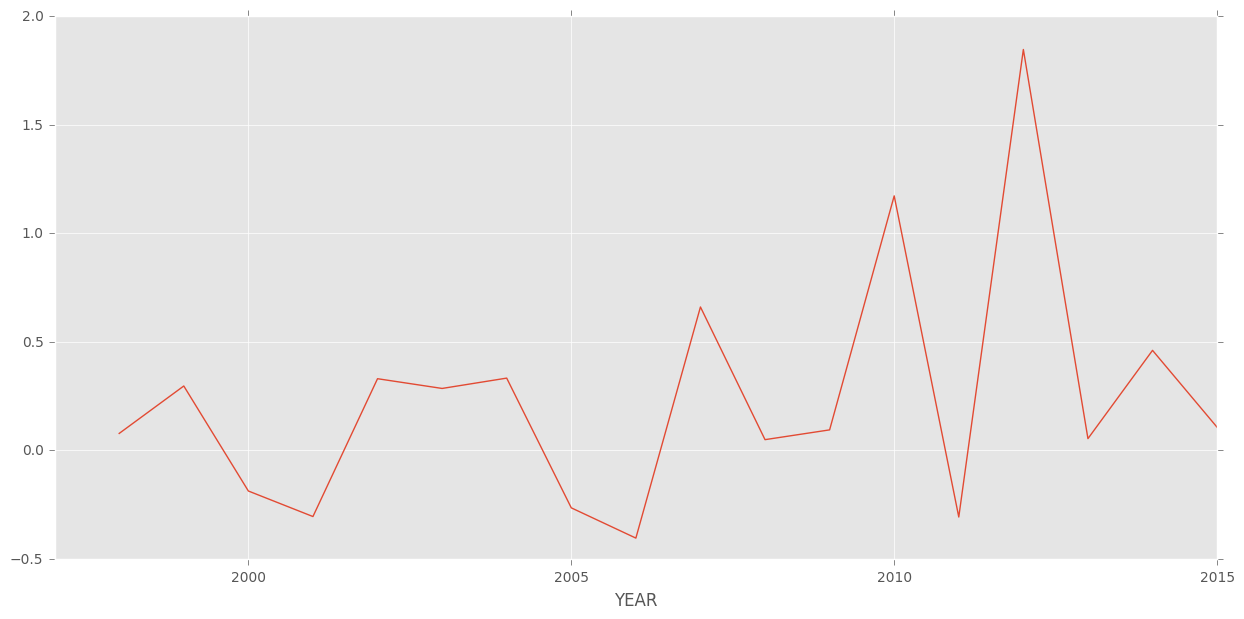

In [6]:
crimes_df.groupby('YEAR').size().pct_change().plot(figsize=(15, 7));

## Let's extract months from our data sets and compare crimes committed month on month for the 1995 to 1999 and 2011 to 2015
*Interesting things may come up*

In [7]:
crimes_df_2015 = crimes_df[crimes_df['YEAR'] == 2015]

In [8]:
crimes_df_2015_grp = crimes_df_2015.groupby(['MONTH']).size().rename('MONTHLY_CRIMES').to_frame()
crimes_df_2015_grp_ftl = crimes_df_2015.groupby('MONTH')['FATALITIES'].sum().rename('SUM_FATALITIES').to_frame()

In [9]:
crimes_df_2015_grp_ftl['MONTH_NUMBER'] = crimes_df_2015_grp_ftl.index

In [10]:
crimes_df_2015_grp_ftl['MONTH'] = crimes_df_2015_grp_ftl.MONTH_NUMBER.map(lambda x: calendar.month_name[x])

def extract_year_df(df, year):
    df_year = df[df['YEAR'] == year]
    df_year_grp = df_year.groupby(['MONTH']).size().rename('MONTHLY_CRIMES').to_frame()
    df_year_grp_ftl = df_year.groupby('MONTH')['FATALITIES'].sum().rename('SUM_FATALITIES').to_frame()
    df_year_grp_ftl = df_year_grp_ftl.reset_index()
    df_year_grp_ftl['MONTH_NAME'] = df_year_grp_ftl.MONTH.map(lambda x: calendar.month_name[x])
    return df_year_grp_ftl

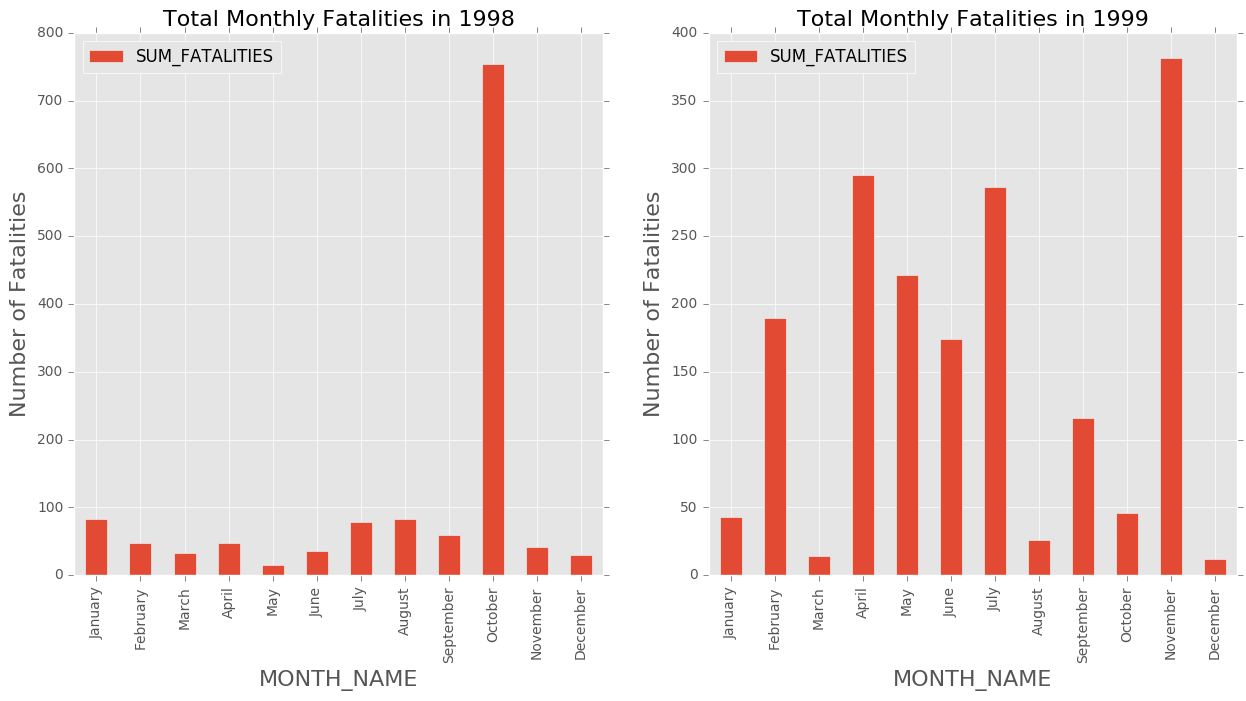

In [11]:
fig, axs = plt.subplots(1,2, figsize=(15, 7))

axs[0].set_xlabel('MONTH', fontsize=16)
axs[0].set_title("Total Monthly Fatalities in 1998", fontsize=16)
axs[0].set_ylabel("Number of Fatalities", fontsize=16)

axs[1].set_xlabel('MONTH', fontsize=16)
axs[1].set_title("Total Monthly Fatalities in 1999", fontsize=16)
axs[1].set_ylabel("Number of Fatalities", fontsize=16)

extract_year_df(crimes_df, 1998).plot(kind='bar',x='MONTH_NAME', y='SUM_FATALITIES', ax=axs[0])
extract_year_df(crimes_df, 1999).plot(kind='bar',x='MONTH_NAME', y='SUM_FATALITIES', ax=axs[1]);

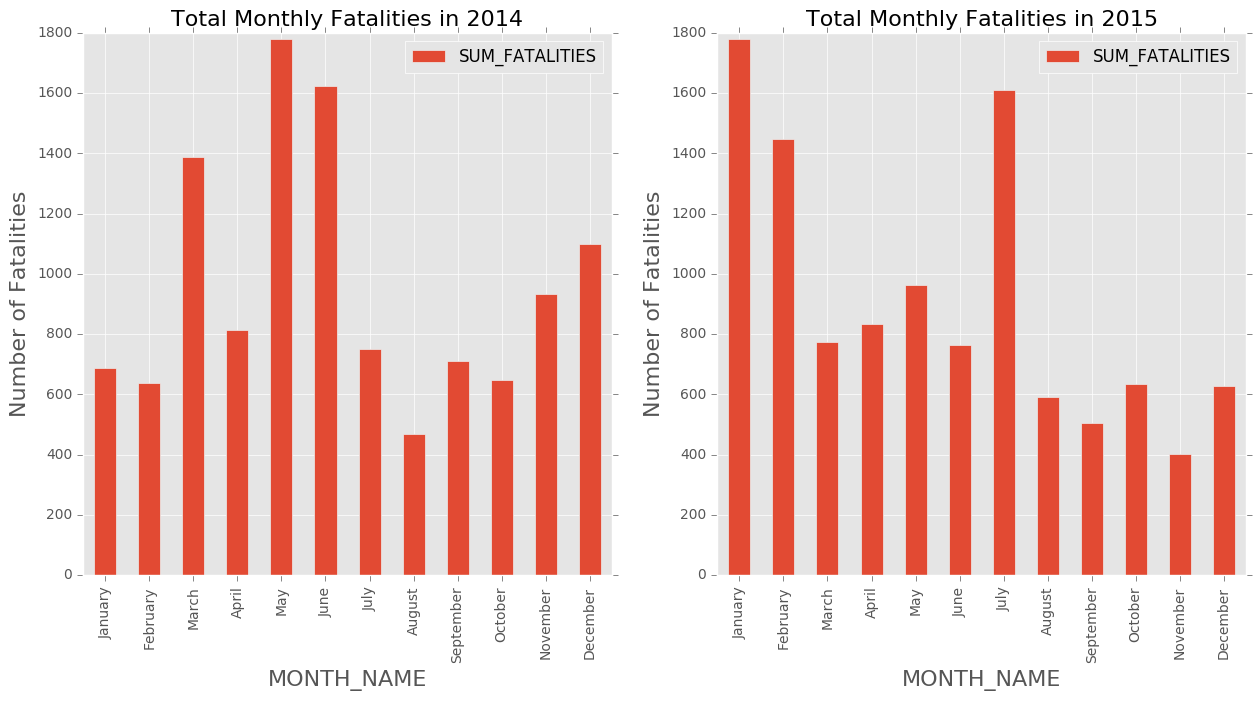

In [12]:
fig, axs = plt.subplots(1,2, figsize=(15, 7))

axs[0].set_xlabel('MONTH', fontsize=16)
axs[0].set_title("Total Monthly Fatalities in 2014", fontsize=16)
axs[0].set_ylabel("Number of Fatalities", fontsize=16)

axs[1].set_xlabel('MONTH', fontsize=16)
axs[1].set_title("Total Monthly Fatalities in 2015", fontsize=16)
axs[1].set_ylabel("Number of Fatalities", fontsize=16)

extract_year_df(crimes_df, 2014).plot(kind='bar',x='MONTH_NAME', y='SUM_FATALITIES', ax=axs[0])
extract_year_df(crimes_df, 2015).plot(kind='bar',x='MONTH_NAME', y='SUM_FATALITIES', ax=axs[1]);

**Comparing death counts from the last two years of Military rule and years 2014 and 2015, it is very clear that we has reduced death counts viz-a-viz crime rates in the country. *(You can also make further interpretations)***

In [13]:
crimes_since_2010 = crimes_df[crimes_df['YEAR'] >= 2010].groupby(['LOCATION'])['FATALITIES'].sum().sort_values(0, False).rename('SUM_OF_FATALITIES').to_frame().reset_index().head(15)

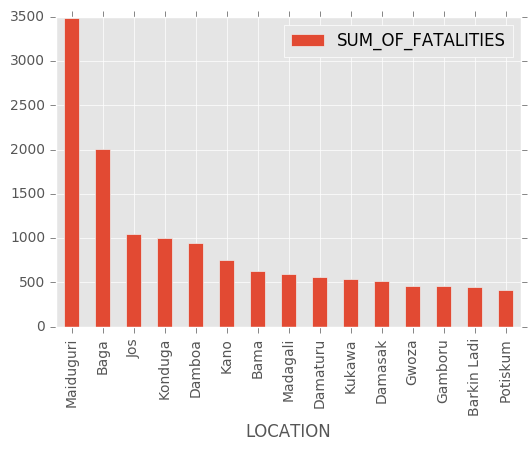

In [14]:
crimes_since_2010.plot(x='LOCATION', y='SUM_OF_FATALITIES', kind='bar');

**Above are the top 15 locations from 2010 to 2015 where we have recorded the highest number of fatalities. It is very obvious that Maiduguri has recorded more 3500 deaths, followed by Baga with about 2000.**

In [15]:
crimes_df_2015['LAT_LON'] = crimes_df_2015[['LATITUDE', 'LONGITUDE']].apply(tuple, axis=1).map(lambda x: list(x))

In [16]:
map_1 = folium.Map(location=[9.0820, 8.6753],
                   zoom_start=7,
                   tiles='Stamen Terrain')

In [17]:
for index, row in crimes_df_2015.iterrows():
    colour = "green"
    if "Boko" in row['ACTOR1']:
        colour = "red"
    folium.Marker(row['LAT_LON'],
              popup=row['EVENT_TYPE'],
              icon=folium.Icon(color=colour, icon='info-sign')
             ).add_to(map_1)
map_1

## Predicting the Next Crime Scene
**After visualizing our data on map, let's create a prediction model based on some clustering technique, KMeans Clustering. I'll leave to reading about [K Means Clustering](https://en.wikipedia.org/wiki/K-means_clustering) as this will help your understanding of the algorithm.**

**As we do not want to bury ourselves in [Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality), we will only be working with few features in our dataset. Bear in the mind that this research is reproducable, hence you may consider playing with other features for better predictions.**

**Features include**
- Crime actors (suspects)
- Type/class of crime (this will help know the right law enforcement agent to deploy)
- Latitude and Longitude (location)
- Day of the year
- Month of the year
- Year

**Number of Clusters: 10**


In [18]:
crimes_df_2015['ACTOR1_ENC'] = pd.factorize(crimes_df_2015['ACTOR1'])[0]
crimes_df_2015['DAY_OF_YEAR'] = crimes_df_2015.EVENT_DATE.dt.dayofyear
crimes_df_2015['EVENT_TYPE_ENC'] = pd.factorize(crimes_df_2015['EVENT_TYPE'])[0]

In [19]:
# import the necessary
from sklearn.cluster import KMeans
import sklearn.metrics as sm

In [20]:
crimes_df_2015_features = crimes_df_2015[['YEAR', 'MONTH', 'DAY_OF_YEAR', 'ACTOR1_ENC', 'EVENT_TYPE_ENC', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'ACTOR1', 'EVENT_TYPE']]

In [21]:
##let's split the data into train and test sets
train = crimes_df_2015_features.sample(frac=0.8,random_state=200)
test = crimes_df_2015_features.drop(train.index)

### Create our model and fit the training dataset

In [23]:
crime_model_2015 = KMeans(n_clusters=10, max_iter=1)
crime_model_2015.fit(train[['YEAR', 'MONTH', 'DAY_OF_YEAR', 'ACTOR1_ENC', 'EVENT_TYPE_ENC', 'LATITUDE', 'LONGITUDE']]);

### Visualizing our cluster geographically

In [24]:
clusters_train = crime_model_2015.labels_
train['CLUSTER'] = clusters_train

In [25]:
cluster_predicted = crime_model_2015.predict(test[['YEAR', 'MONTH', 'DAY_OF_YEAR', 'ACTOR1_ENC', 'EVENT_TYPE_ENC', 'LATITUDE', 'LONGITUDE']])

In [26]:
map_2 = folium.Map(location=[9.0820, 8.6753],
                   zoom_start=5,
                   tiles='Mapbox Control Room')

In [27]:
train['LAT_LON'] = train[['LATITUDE', 'LONGITUDE']].apply(tuple, axis=1).map(lambda x: list(x))
test['LAT_LON'] = test[['LATITUDE', 'LONGITUDE']].apply(tuple, axis=1).map(lambda x: list(x))

In [28]:
test['CLUSTER'] = cluster_predicted

In [29]:
for index, row in train.iterrows():
    colour = "green"
    pop_up = "Crime Type: {}\nCluser: {}".format(row['EVENT_TYPE'], row['CLUSTER'])
    pop_up = unicode(str(pop_up), 'utf-8')
    
    if "Boko" in row['ACTOR1']:
        colour = "red"
    folium.Marker(row['LAT_LON'],
              popup=pop_up,
              icon=folium.Icon(color=colour, icon='info-sign')
             ).add_to(map_2)
map_2

## Finally, let's visualize our predicted clusters and see how we fair with our model and prediction

In [30]:
map_3 = folium.Map(location=[9.0820, 8.6753],
                   zoom_start=6,
                   tiles='Mapbox Control Room')

In [31]:
for index, row in test.iterrows():
    colour = "green"
    pop_up = "Crime Type: {}, Cluser: {}".format(row['EVENT_TYPE'], row['CLUSTER'])
    pop_up = unicode(str(pop_up), 'utf-8')
    
    if "Boko" in row['ACTOR1']:
        colour = "red"
    folium.Marker(row['LAT_LON'],
              popup=pop_up,
              icon=folium.Icon(color=colour, icon='info-sign')
             ).add_to(map_3)
map_3

## Recommendations
- The North-Western part of Nigeria recorded lesser crime rates in 2015. Hence, activities that encourage economic growths should be encouraged in these areas
- Security measures/policies implementated in the North-West can be copied and deployed to other geo-political zones
- The North-East and South-South are proved to be very peculiar. Further analysis can be done to better inform on proper policies to curtail crime in these areas.
- In addition, further analysis using [Graph Modeling Techniques](https://en.wikipedia.org/wiki/Graphical_model) can also be done to uncover connections between crime scenes and suspects. 

## Conclusions
**There are lot's of inferences to draw from this analysis, however I have only pointed out few**.

**Data Science in Nigeria is still in its infancies and its applications towards our socio-economic transformation is massive and unlimited. Making our nation a safer place is collective effort as move towards our 2025 vision. *#iPlayMyPartWithData***

-- Olalekan Elesin,

**Lead Analyst, [Gidi Analytica](http://www.gidianalytica.org)**